In [1]:
import numpy as np
import matplotlib.pyplot as plt

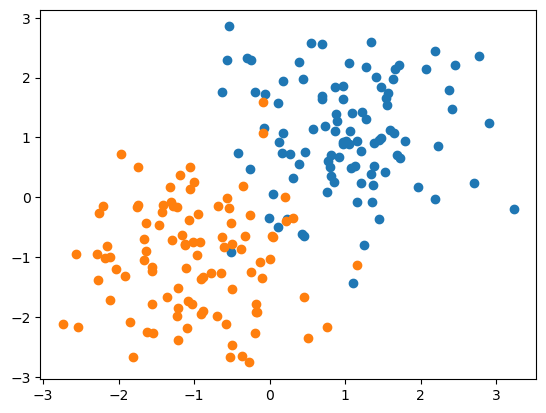

In [58]:
# generate dataset with two classes (labeled as 0 and 1)

cls1 = np.column_stack((np.random.normal(loc = [-1, -1], scale=[.9, .9], size=(100, 2)), np.ones(100)))
cls2 = np.column_stack((np.random.normal(loc = [1, 1], scale=[.9, .9], size=(100, 2)), np.zeros(100)))

data_set = np.concatenate((cls1, cls2))
np.random.shuffle(data_set)

features = data_set[:, :-1]
labels = data_set[:, -1]

plt.scatter(features[labels == 0][:, 0], features[labels == 0][:, 1])
plt.scatter(features[labels == 1][:, 0], features[labels == 1][:, 1])

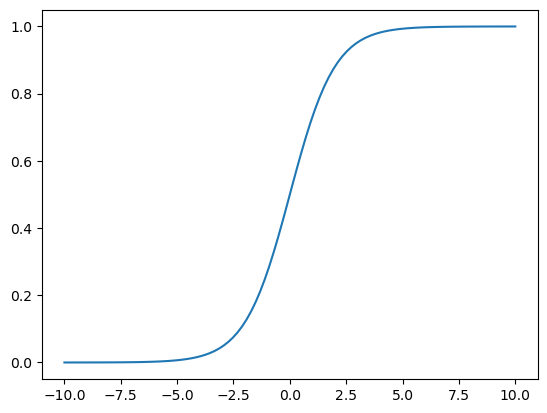

In [59]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

plt.plot(np.linspace(-10, 10, 100), sigmoid(np.linspace(-10, 10, 100)))

In [65]:
n_iter = 100
w_old = np.random.rand(2, 1)

for i in range(n_iter):
    predictions = sigmoid(features @ w_old)[:, 0]
    gradient = features.T @ (predictions - labels)
    R = np.diag(predictions * (1 - predictions))
    hessian_matrix = features.T @ R @ features
    w_new = w_old - (np.linalg.inv(hessian_matrix) @ gradient).reshape((2, 1))
    if np.allclose(w_old, w_new):
        break
    w_old = w_new

i, w_old

(5,
 array([[-3.39136051],
        [-2.02251288]]))

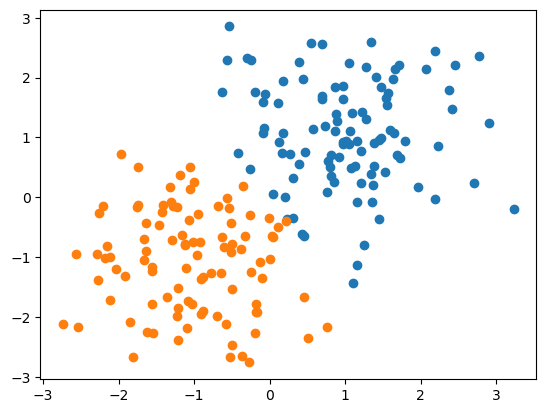

In [66]:
predictions = sigmoid(features @ w_old)[:, 0]
predictions[predictions > 0.5] = 1
predictions[predictions <= 0.5] = 0

plt.scatter(features[predictions == 0][:, 0], features[predictions == 0][:, 1])
plt.scatter(features[predictions == 1][:, 0], features[predictions == 1][:, 1])